Saving spam_ham_dataset.csv to spam_ham_dataset.csv
Uploaded file: spam_ham_dataset.csv
   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  
Data preprocessing complete.
Accuracy: 0.9468599033816425
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      0.95      0.96       742
        spam       0.89      0.93      0.91       293

    accuracy                           0.95      1035
   macro avg       0.93      0.94      0.94      1035
weighted avg       0.95 

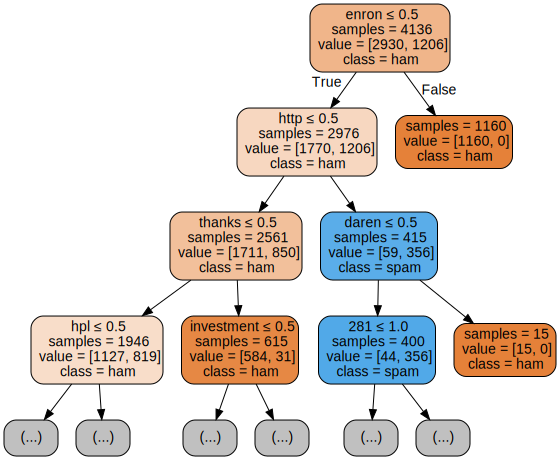

In [1]:
from google.colab import files
import pandas as pd
import io
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, accuracy_score
import graphviz

# Upload the dataset file
uploaded = files.upload()

# Assume only one file is uploaded
file_name = list(uploaded.keys())[0]
print(f"Uploaded file: {file_name}")

# Load the dataset into a pandas DataFrame
dataset = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Display the first few rows of the dataset
print(dataset.head())

# Prepare the data
if 'label' in dataset.columns:
    X = dataset['text']
    y = dataset['label']
else:
    X = dataset['text']
    y = dataset['spam']
    print("Warning: Using column 'spam' as label. Please verify if this is correct.")

# Convert labels to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Convert text data to numeric features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing complete.")

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
target_names = [str(cls) for cls in label_encoder.classes_]
print(classification_report(y_test, y_pred, target_names=target_names))

# Export the decision tree to a DOT file
dot_data = export_graphviz(clf,
                           out_file=None,
                           feature_names=vectorizer.get_feature_names_out(),
                           class_names=target_names,
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           max_depth=3,  # Limit the depth of the tree for compactness
                           proportion=False,  # Show absolute counts
                           impurity=False)  # Hide the impurity value

# Create a graph from the DOT data
graph = graphviz.Source(dot_data)

# Display the graph
graph.render('decision_tree', format='png', cleanup=True)  # Save as PNG
graph  # Display the graph in a Jupyter notebook or Colab
